# Stable Diffusion 2.1 Tutorial

In [1]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-ce3esvt2
  Running command git clone -q https://github.com/huggingface/diffusers.git /tmp/pip-req-build-ce3esvt2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.8 MB 31.2 MB/s 
     |████████████████████████████████| 191 kB 72.7 MB/s 
     |████████████████████████████████| 33.8 MB 1.2 MB/s 
     |████████████████████████████████| 182 kB 83.2 MB/s 
     |████████████████████████████████| 7.6 MB 68.5 MB/s 
  Created wheel for diffusers: filename=diffusers-0.10.0.dev0-py3-none-any.whl size=503010 sha256=e4978650f54e7acf8a3822c7ecc45278df48614d7cbdd9243cd463c854c4c04f
  Stored in directory: /tmp/pip-ephem-wheel-cache-0hx8ecbk/wheels/28/16/cf/d8d37579fd1e7edb978252d850ec9328b055a7582ddfae3b87
Succes

In [2]:
!nvidia-smi

Thu Dec  8 14:39:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch

model_id = "stabilityai/stable-diffusion-2-1"

# Use the Euler scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Downloading:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/633 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/824 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/939 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [4]:
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]
    
image.save("astronaut_rides_horse.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [14]:
lovely_cat = "lovely radioactive cat on the couch with red eyes"
futuristic_cars = "futuristic cars in the sahara desert with qatar tower in the background"

In [6]:
def text_to_image(prompt):

  image = pipe(prompt, 
               height=768, 
               width=768).images[0]

  return image

  0%|          | 0/50 [00:00<?, ?it/s]

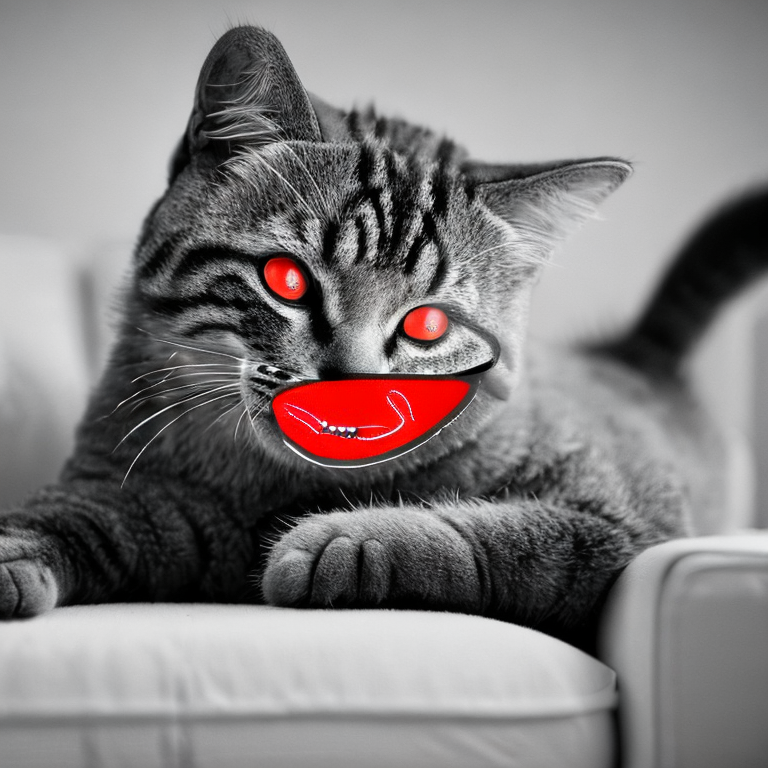

In [9]:
text_to_image(lovely_cat)

  0%|          | 0/50 [00:00<?, ?it/s]

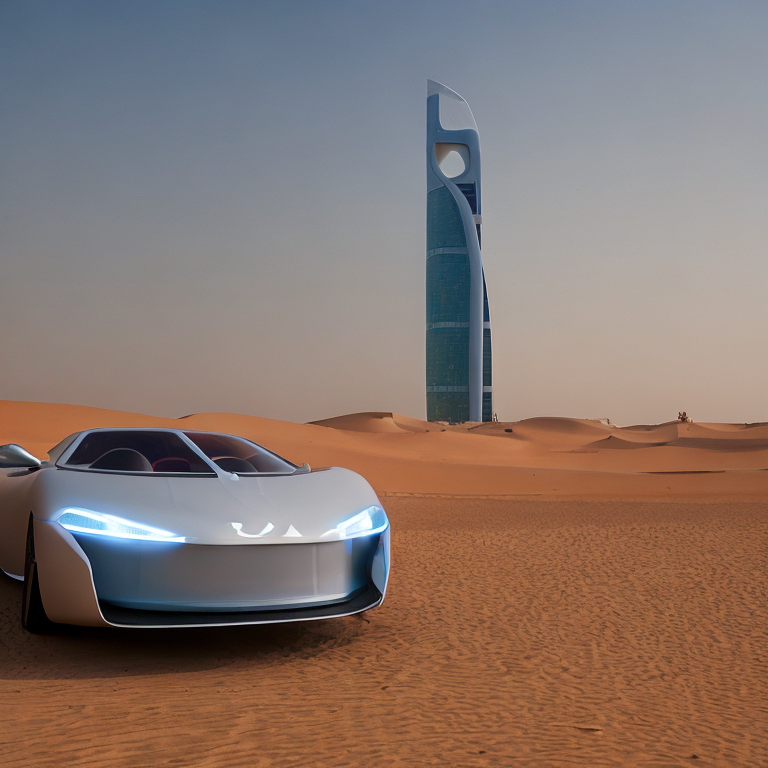

In [11]:
text_to_image(futuristic_cars)